# Whitening And Coloring Transform

The next step once you have your autoencoders is to implement a transform to be done that performs the style transfer on the encoded image.
This is the Whitening and Color Transform described in the paper. 

In [1]:
# !pip install ipywidgets -U

In [30]:
!gsutil cp gs://nacharya114-models/vgg/autoencoder/relu_1_1_autoencoder/checkpoints/most_recent.pt ./model/relu_1_1.pt

Copying gs://nacharya114-models/vgg/autoencoder/relu_1_1_autoencoder/checkpoints/most_recent.pt...
/ [1 files][ 15.4 KiB/ 15.4 KiB]                                                
Operation completed over 1 objects/15.4 KiB.                                     


In [3]:
%matplotlib inline
import torch
import torch.nn as nn
import torchvision
from torchvision import datasets, transforms
from PIL import Image
from torchvision.utils import save_image
from torch.utils.data import Dataset
import natsort
import os
import matplotlib.pyplot as plt

from universal_nst.model.vgg import VGGAutoEncoder

In [31]:
# init the model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

state_dicts = torch.load("./model/relu_1_1.pt")

relu_1_1 = VGGAutoEncoder(rep_layer="relu_1_1", load_vgg=False)

relu_1_1.load_state_dict(state_dicts, strict=False)
relu_1_1.to(device)
relu_1_1.eval()

VGGAutoEncoder(
  (encoder): Sequential(
    (conv1_1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (relu_1_1): ReLU(inplace=True)
  )
  (decoder): Sequential(
    (mir_relu_1_1): ReLU(inplace=True)
    (deconv1_1): ConvTranspose2d(64, 3, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  )
)

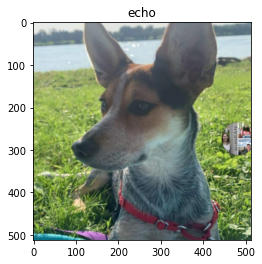

In [33]:
from universal_nst.utils import preprocess, image_to_tensor
from torchvision.transforms import ToPILImage


def imshow(tensor, title=None):
    image = tensor.cpu().clone()  # we clone the tensor to not do changes on it

    inv_normalize = transforms.Normalize(
      mean=[-0.485/0.229, -0.456/0.224, -0.406/0.225],
      std=[1/0.229, 1/0.224, 1/0.225]
      ) 
    image = inv_normalize(image) # inverse the normalization we did on the image

    image = image.squeeze(0)      # remove the fake batch dimension
    image = ToPILImage()(image)
    plt.imshow(image)
    if title is not None:
        plt.title(title)
    plt.pause(0.001) # pause a bit so that plots are updated
    
echo_img = image_to_tensor("./imgs/echo_picnic.jpg")

imshow(echo_img, "echo")


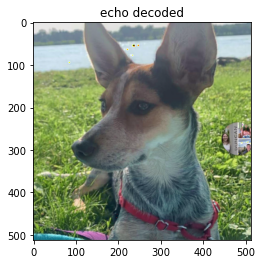

In [34]:
echo_decoded = relu_1_1(echo_img)
imshow(echo_decoded, "echo decoded")

In [39]:
# Create a WCT layer
import torch.linalg

def whitening(content: troch.Tensor):
    

class WCTransform(torch.nn.module):
    
    def __init__(self, weight=0.7):
        self.weight = 0.7
    
    def forward(self, content, style):
        


None


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the gradient for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more information.
  """Entry point for launching an IPython kernel.
